### 0. Load Dependencies

In [1]:
import numpy as np
import pickle
import time
from KNN_Shapley import get_VN, get_true_KNN, compute_KNN_shapley, compute_KNN_Asymmetric_Shapley, KNN_LOO, Logistic_LOO
from performance_plot import removing_sequential_data, adding_sequential_data, final_plot
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### 1. Load Data

In [6]:
# Load data
n_samples = 10
m1, m2, m3, m4, m5, m6 = 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'

X_m1_trn_lst, y_m1_trn_lst, X_m2_trn_lst, y_m2_trn_lst, X_m3_trn_lst, y_m3_trn_lst = [], [], [], [], [], []
X_m1m2_trn_lst, y_m1m2_trn_lst, X_m1m2_val_lst, y_m1m2_val_lst = [], [], [], []
X_m1m2m3_trn_lst, y_m1m2m3_trn_lst, X_m1m2m3_val_lst, y_m1m2m3_val_lst = [], [], [], []
X_m3_lst, y_m3_lst, X_m4_lst, y_m4_lst, X_m5_lst, y_m5_lst, X_m6_lst, y_m6_lst = [], [], [], [], [], [], [], []
X_heldout_ex1_lst = []

for i_split in range(n_samples):
    
    with open("data/traffic/traffic_volume_split{}.pickle".format(i_split+1), "rb") as fp:
        mydict = pickle.load(fp)

    X_m1_trn_lst.append(mydict['X_{}_trn'.format(m1)])
    y_m1_trn_lst.append(mydict['y_{}_trn'.format(m1)])
    X_m2_trn_lst.append(mydict['X_{}_trn'.format(m2)])
    y_m2_trn_lst.append(mydict['y_{}_trn'.format(m2)])
    X_m3_trn_lst.append(mydict['X_{}_trn'.format(m3)])
    y_m3_trn_lst.append(mydict['y_{}_trn'.format(m3)])

    X_m1m2_trn_lst.append(mydict['X_{}_{}_trn'.format(m1, m2)])
    y_m1m2_trn_lst.append(mydict['y_{}_{}_trn'.format(m1, m2)])
    X_m1m2_val_lst.append(mydict['X_{}_{}_val'.format(m1, m2)])
    y_m1m2_val_lst.append(mydict['y_{}_{}_val'.format(m1, m2)])

    X_m1m2m3_trn_lst.append(mydict['X_{}_{}_{}_trn'.format(m1, m2, m3)])
    y_m1m2m3_trn_lst.append(mydict['y_{}_{}_{}_trn'.format(m1, m2, m3)])
    X_m1m2m3_val_lst.append(mydict['X_{}_{}_{}_val'.format(m1, m2, m3)])
    y_m1m2m3_val_lst.append(mydict['y_{}_{}_{}_val'.format(m1, m2, m3)])

    X_m3_lst.append(mydict['X_{}'.format(m3)])
    y_m3_lst.append(mydict['y_{}'.format(m3)])
    X_m4_lst.append(mydict['X_{}'.format(m4)])
    y_m4_lst.append(mydict['y_{}'.format(m4)])
    X_m5_lst.append(mydict['X_{}'.format(m5)])
    y_m5_lst.append(mydict['y_{}'.format(m5)])
    X_m6_lst.append(mydict['X_{}'.format(m6)])
    y_m6_lst.append(mydict['y_{}'.format(m6)])
    
s_class_dic = {0:np.asarray(range(len(X_m1_trn_lst[0]))), 
               1:np.asarray(range(len(X_m1_trn_lst[0]), len(X_m1m2_trn_lst[0])))}

### 2. Compute KNN values

In [10]:
K = 5
n_samples = 10

for i_sample in range(n_samples):
    
    print('i_sample', i_sample)
    directory = 'experiments/sequential data valuation/traffic 10 random splits/split{}/experiment_1/'.format(i_sample+1)
    
    # Train KNN Classifier
    x_m1m2_knn_gt = get_true_KNN(X_m1m2_trn_lst[i_sample], X_m1m2_val_lst[i_sample])  # train knn classifier
    
    # Compute KNN shapley
    start = time.time()
    knn_shaps = compute_KNN_shapley(y_m1m2_trn_lst[i_sample], x_m1m2_knn_gt, y_m1m2_val_lst[i_sample], K)
    end = time.time()
    print("Time to compute the exact symmetric shapley values for all data:", end - start)
    np.save(directory + 'm1_m2_sv_K={}_'.format(K), knn_shaps)
    
    # Compute KNN asymmetric shapley
    start = time.time()
    knn_asym_shaps = compute_KNN_Asymmetric_Shapley(y_m1m2_trn_lst[i_sample], x_m1m2_knn_gt, 
                                                    y_m1m2_val_lst[i_sample], K, s_class_dic)
    end = time.time()
    print("Time to compute the exact asymmetric shapley values for all data:", end - start)
    np.save(directory + 'm1_m2_asv_K={}_'.format(K), knn_asym_shaps)

i_sample 0


100%|████████████████████████████████████████| 420/420 [00:00<00:00, 621.22it/s]


Time to compute the exact symmetric shapley values for all data: 0.6770880222320557


100%|█████████████████████████████████████████| 420/420 [00:05<00:00, 75.78it/s]


Time to compute the exact asymmetric shapley values for all data: 7.227859973907471
i_sample 1


100%|████████████████████████████████████████| 420/420 [00:00<00:00, 625.05it/s]


Time to compute the exact symmetric shapley values for all data: 0.6728451251983643


100%|█████████████████████████████████████████| 420/420 [00:05<00:00, 74.56it/s]


Time to compute the exact asymmetric shapley values for all data: 7.3609938621521
i_sample 2


100%|████████████████████████████████████████| 420/420 [00:00<00:00, 619.75it/s]


Time to compute the exact symmetric shapley values for all data: 0.6786501407623291


100%|█████████████████████████████████████████| 420/420 [00:05<00:00, 75.62it/s]


Time to compute the exact asymmetric shapley values for all data: 7.27001690864563
i_sample 3


100%|████████████████████████████████████████| 420/420 [00:00<00:00, 623.26it/s]


Time to compute the exact symmetric shapley values for all data: 0.6747169494628906


100%|█████████████████████████████████████████| 420/420 [00:05<00:00, 74.97it/s]


Time to compute the exact asymmetric shapley values for all data: 7.3390960693359375
i_sample 4


100%|████████████████████████████████████████| 420/420 [00:00<00:00, 615.74it/s]


Time to compute the exact symmetric shapley values for all data: 0.6832890510559082


100%|█████████████████████████████████████████| 420/420 [00:05<00:00, 75.60it/s]


Time to compute the exact asymmetric shapley values for all data: 7.299561977386475
i_sample 5


100%|████████████████████████████████████████| 420/420 [00:00<00:00, 613.00it/s]


Time to compute the exact symmetric shapley values for all data: 0.6861350536346436


100%|█████████████████████████████████████████| 420/420 [00:05<00:00, 75.47it/s]


Time to compute the exact asymmetric shapley values for all data: 7.295921087265015
i_sample 6


100%|████████████████████████████████████████| 420/420 [00:00<00:00, 620.57it/s]


Time to compute the exact symmetric shapley values for all data: 0.6776618957519531


100%|█████████████████████████████████████████| 420/420 [00:05<00:00, 75.21it/s]


Time to compute the exact asymmetric shapley values for all data: 7.324080944061279
i_sample 7


100%|████████████████████████████████████████| 420/420 [00:00<00:00, 610.36it/s]


Time to compute the exact symmetric shapley values for all data: 0.6893188953399658


100%|█████████████████████████████████████████| 420/420 [00:05<00:00, 74.57it/s]


Time to compute the exact asymmetric shapley values for all data: 7.362587213516235
i_sample 8


100%|████████████████████████████████████████| 420/420 [00:00<00:00, 613.34it/s]


Time to compute the exact symmetric shapley values for all data: 0.6855928897857666


100%|█████████████████████████████████████████| 420/420 [00:05<00:00, 74.69it/s]


Time to compute the exact asymmetric shapley values for all data: 7.361996650695801
i_sample 9


100%|████████████████████████████████████████| 420/420 [00:00<00:00, 620.52it/s]


Time to compute the exact symmetric shapley values for all data: 0.6778488159179688


100%|█████████████████████████████████████████| 420/420 [00:05<00:00, 75.75it/s]

Time to compute the exact asymmetric shapley values for all data: 7.278055191040039


### 3. Load MC values

In [12]:
knn_sv_lst, mc_sv_knn_lst, knn_asv_lst, mc_asv_knn_lst, loo_knn_lst, rand_lst = [], [], [], [], [], []
seeds = [42, 123, 2020, 314, 2021, 111, 999, 777, 1010, 888]
num_permutations = 2000

for i_sample in range(n_samples):
    
    print(' ')
    print('i_sample', i_sample+1)
    directory = 'experiments/sequential data valuation/traffic 10 random splits/split{}/experiment_1/'.format(i_sample+1)
    
    # Load knn-sv
    knn_sv_lst.append(np.load(directory + 'm1_m2_sv_K={}_'.format(K) + '.npy'))

    # Load knn-asv
    knn_asv_lst.append(np.load(directory + 'm1_m2_asv_K={}_'.format(K) + '.npy'))
    
    # Load knn-loo values
    with open(directory + 'loo_model=KNN_metric=accuracy.pkl', 'rb') as fp:
        loo_dict = pickle.load(fp)
    loo_knn = loo_dict['loo']
    loo_knn_lst.append(loo_knn)
    print('loo_knn.shape', loo_knn.shape)
    
    # Load mc-knn-sv
    with open(directory + 'tmc_shapley_model=KNN_metric=accuracy.pkl', 'rb') as fp:
        mc_sv_dict = pickle.load(fp)
    mc_sv_knn = np.mean(mc_sv_dict['marginals_tmc'][:num_permutations], axis=0)
    mc_sv_knn_lst.append(mc_sv_knn)
    print('mc_sv_knn.shape', mc_sv_dict['marginals_tmc'].shape,
          mc_sv_dict['marginals_tmc'][:num_permutations].shape)
    
    # Load mc-knn-asv
    with open(directory + 'tmc_asymmetric_shapley_model=KNN_metric=accuracy.pkl', 'rb') as fp:
        mc_asv_dict = pickle.load(fp)
    mc_asv_knn = np.mean(mc_asv_dict['marginals_tmc'][:num_permutations], axis=0)
    mc_asv_knn_lst.append(mc_asv_knn)
    print('mc_asv_knn.shape', mc_asv_dict['marginals_tmc'].shape,
          mc_asv_dict['marginals_tmc'][:num_permutations].shape)
        
    # random permutation of values (baseline)
    seed = seeds[i_sample-1]
    np.random.seed(seed)
    rand_lst.append(np.random.rand(len(X_m1m2_trn_lst[i_sample])))

 
i_sample 1
loo_knn.shape (978,)
mc_sv_knn.shape (5000, 978) (2000, 978)
mc_asv_knn.shape (5000, 978) (2000, 978)
 
i_sample 2
loo_knn.shape (978,)
mc_sv_knn.shape (5000, 978) (2000, 978)
mc_asv_knn.shape (5000, 978) (2000, 978)
 
i_sample 3
loo_knn.shape (978,)
mc_sv_knn.shape (5000, 978) (2000, 978)
mc_asv_knn.shape (5000, 978) (2000, 978)
 
i_sample 4
loo_knn.shape (978,)
mc_sv_knn.shape (5000, 978) (2000, 978)
mc_asv_knn.shape (5000, 978) (2000, 978)
 
i_sample 5
loo_knn.shape (978,)
mc_sv_knn.shape (5000, 978) (2000, 978)
mc_asv_knn.shape (5000, 978) (2000, 978)
 
i_sample 6
loo_knn.shape (978,)
mc_sv_knn.shape (5000, 978) (2000, 978)
mc_asv_knn.shape (5000, 978) (2000, 978)
 
i_sample 7
loo_knn.shape (978,)
mc_sv_knn.shape (5000, 978) (2000, 978)
mc_asv_knn.shape (5000, 978) (2000, 978)
 
i_sample 8
loo_knn.shape (978,)
mc_sv_knn.shape (5000, 978) (2000, 978)
mc_asv_knn.shape (5000, 978) (2000, 978)
 
i_sample 9
loo_knn.shape (978,)
mc_sv_knn.shape (5000, 978) (2000, 978)
mc_asv

### 4. Performance plot (KNN)

In [15]:
def removing_sequential_data(shap_vals_lst, shap_vals_algo_lst, X_ori_aug, y_ori_aug, X_test, y_test,
                             num_trn_ori, ind_arr, directory, model, metrics, plot_every_percentage, 
                             low_value_first=True):

    frac_data_removed = []
    sort_val_idxs_lst = []
    ind_arr_lst = []

    num_trn = len(X_ori_aug)
    num_trn_aug = num_trn - num_trn_ori

    for j in range(len(shap_vals_lst)):
        if low_value_first:
            sort_val_idxs_lst.append(np.argsort(shap_vals_lst[j]))
            ind_arr_lst.append(ind_arr[np.argsort(shap_vals_lst[j])])
        else:
            sort_val_idxs_lst.append(np.argsort(shap_vals_lst[j])[::-1])
            ind_arr_lst.append(ind_arr[np.argsort(shap_vals_lst[j])[::-1]])

    acc_score_lst = [[] for _ in range(len(shap_vals_lst))]
    
    for i in range(0, num_trn_aug, round(num_trn_aug * plot_every_percentage)):
        frac_data_removed.append(round(i / num_trn_aug, 2) * 100)
        for j in range(len(shap_vals_lst)):
            selected_idxs_j = np.concatenate((sort_val_idxs_lst[j][ind_arr_lst[j] == 1], sort_val_idxs_lst[j][ind_arr_lst[j] == 0][i:]))
            model.fit(X_ori_aug[selected_idxs_j], y_ori_aug[selected_idxs_j])
            preds = model.predict(X_test)
            if metrics=='acc':
                acc = accuracy_score(y_test, preds)
            elif metrics=='auc':
                acc = roc_auc_score(y_test, preds)
            acc_score_lst[j].append(acc)

    data_dict = dict(zip(shap_vals_algo_lst, acc_score_lst))
    data_dict['frac_data_removed'] = frac_data_removed

    with open(directory, "wb") as fp:
        pickle.dump(data_dict, fp)

    for i in range(len(shap_vals_algo_lst)):
        plt.plot(data_dict['frac_data_removed'], data_dict[shap_vals_algo_lst[i]], label=shap_vals_algo_lst[i])
    plt.legend(loc='best')
    plt.show()
    return


def adding_sequential_data(shap_vals_lst, shap_vals_algo_lst, X_ori_aug, y_ori_aug, X_test, y_test,
                            num_trn_ori, ind_arr, directory, model, metrics, plot_every_percentage, 
                           low_value_first=True):

    frac_data_removed = []
    sort_val_idxs_lst = []
    ind_arr_lst = []

    num_trn = len(X_ori_aug)
    num_trn_aug = num_trn - num_trn_ori

    for i in range(len(shap_vals_lst)):
        if low_value_first:
            sort_val_idxs_lst.append(np.argsort(shap_vals_lst[i]))
            ind_arr_lst.append(ind_arr[np.argsort(shap_vals_lst[i])])
        else:
            sort_val_idxs_lst.append(np.argsort(shap_vals_lst[i])[::-1])
            ind_arr_lst.append(ind_arr[np.argsort(shap_vals_lst[i])[::-1]])

    acc_score_lst = [[] for _ in range(len(shap_vals_lst))]

    for i in range(0, num_trn_aug, round(num_trn_aug * plot_every_percentage)):
        frac_data_removed.append(round(i / num_trn_aug, 2) * 100)
        for j in range(len(shap_vals_lst)):
            selected_idxs_j = np.concatenate((sort_val_idxs_lst[j][ind_arr_lst[j] == 1], sort_val_idxs_lst[j][ind_arr_lst[j] == 0][:i]))
            model.fit(X_ori_aug[selected_idxs_j], y_ori_aug[selected_idxs_j])
            preds = model.predict(X_test)
            if metrics=='acc':
                acc = accuracy_score(y_test, preds)
            elif metrics=='auc':
                acc = roc_auc_score(y_test, preds)
            acc_score_lst[j].append(acc)

    data_dict = dict(zip(shap_vals_algo_lst, acc_score_lst))
    data_dict['frac_data_added'] = frac_data_removed

    with open(directory, "wb") as fp:
        pickle.dump(data_dict, fp)

    for i in range(len(shap_vals_algo_lst)):
        plt.plot(data_dict['frac_data_added'], data_dict[shap_vals_algo_lst[i]], label=shap_vals_algo_lst[i])
    plt.legend(loc='best')
    plt.show()
    return

i_sample 0
Removing low value augmented data experiment started...


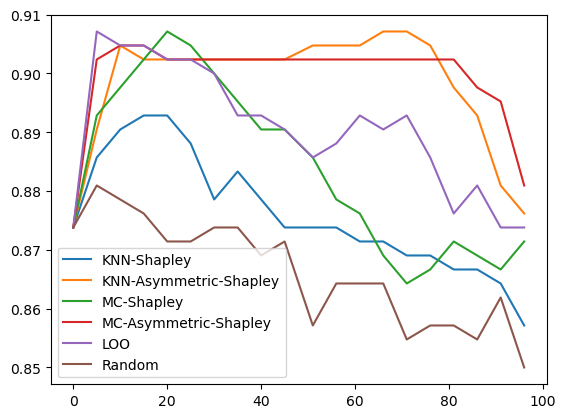

Removing high value augmented data experiment started...


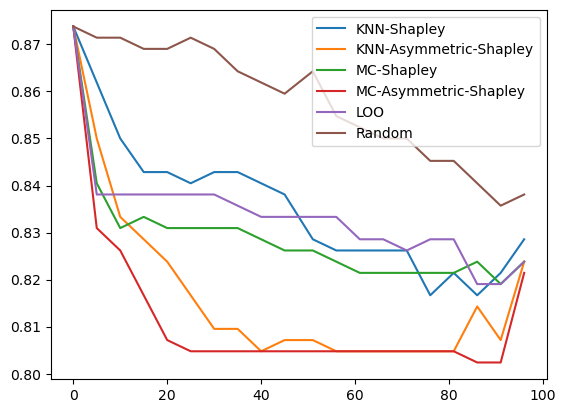

Adding low value augmented data experiment started...


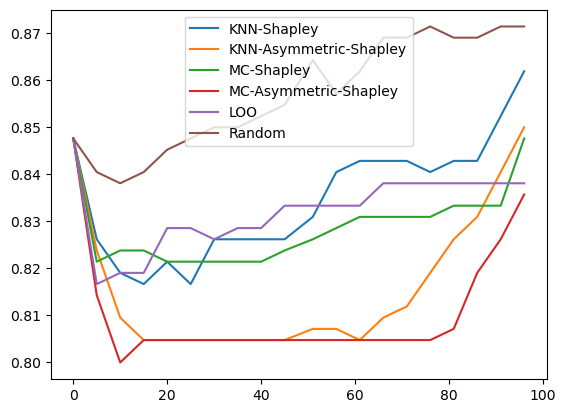

Adding high value augmented data experiment started...


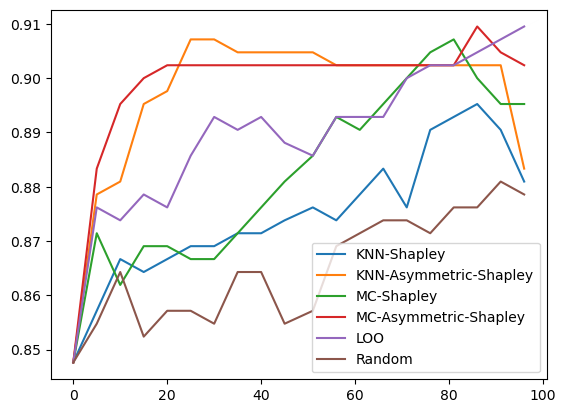

i_sample 1
Removing low value augmented data experiment started...


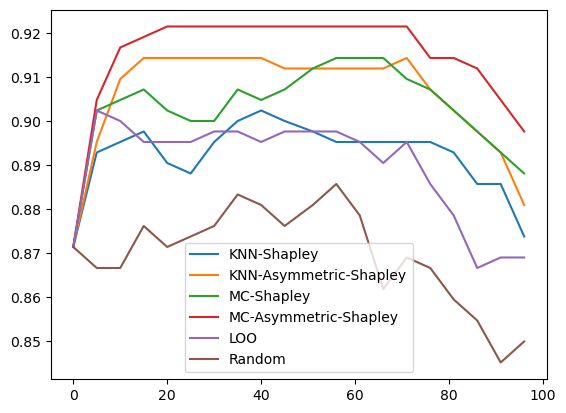

Removing high value augmented data experiment started...


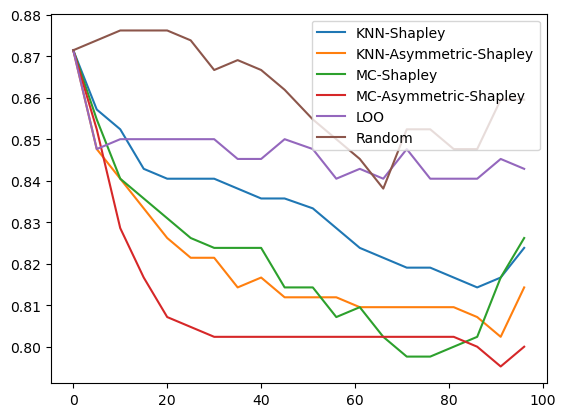

Adding low value augmented data experiment started...


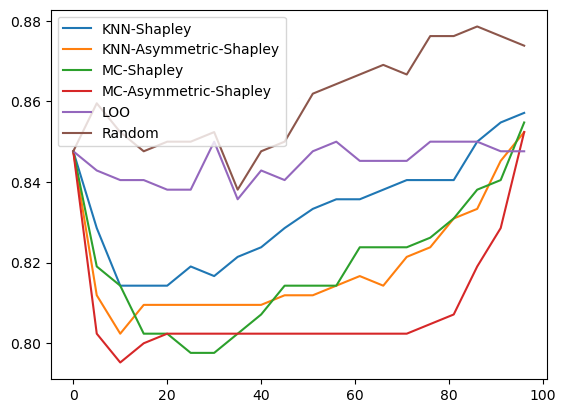

Adding high value augmented data experiment started...


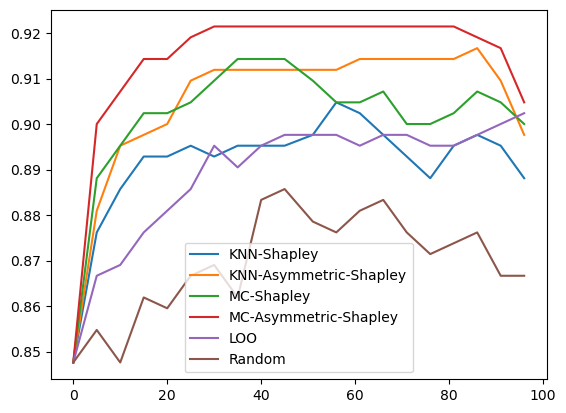

i_sample 2
Removing low value augmented data experiment started...


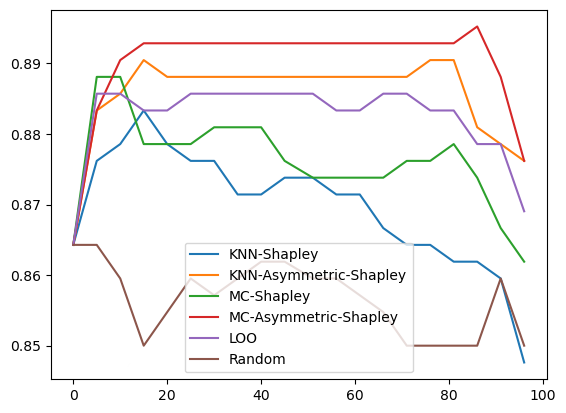

Removing high value augmented data experiment started...


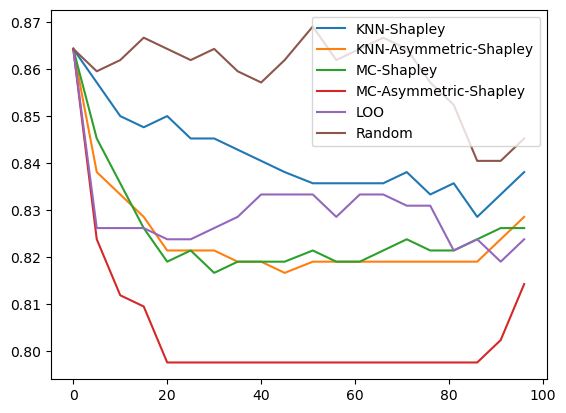

Adding low value augmented data experiment started...


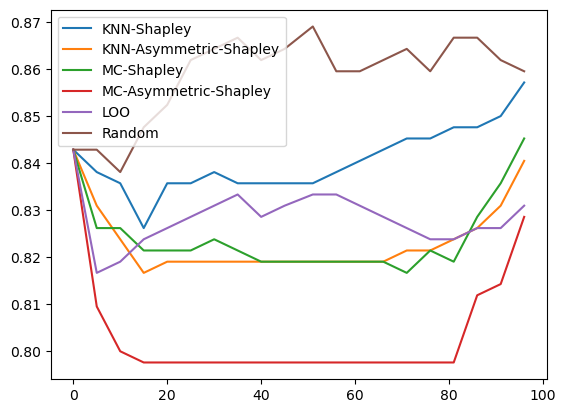

Adding high value augmented data experiment started...


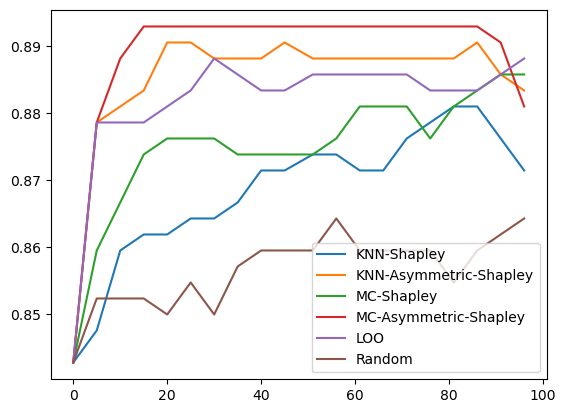

i_sample 3
Removing low value augmented data experiment started...


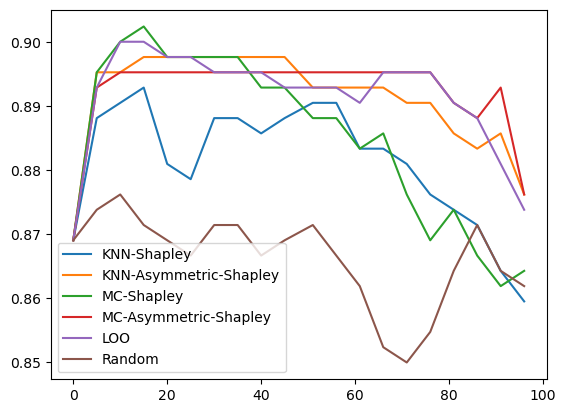

Removing high value augmented data experiment started...


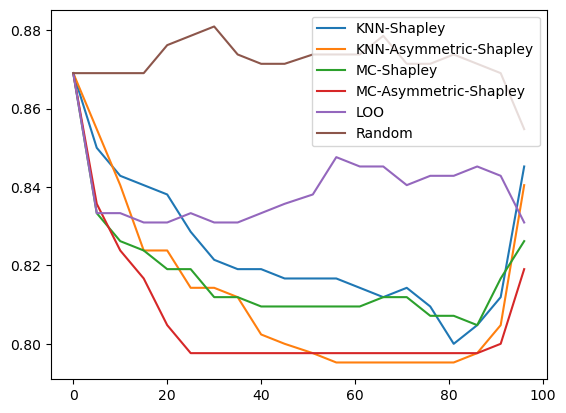

Adding low value augmented data experiment started...


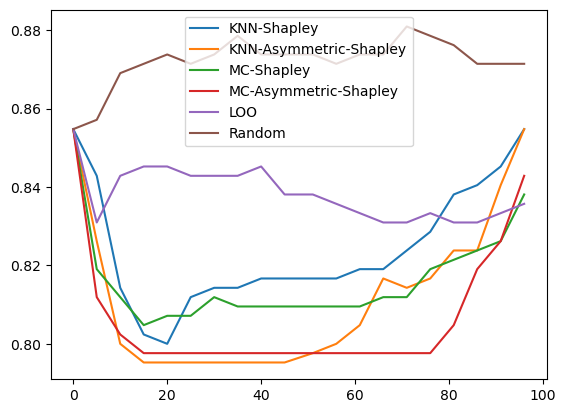

Adding high value augmented data experiment started...


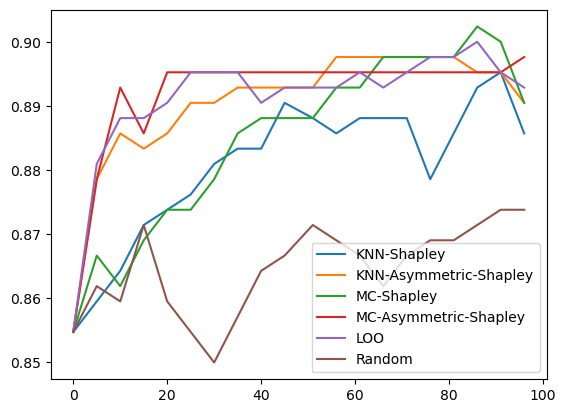

i_sample 4
Removing low value augmented data experiment started...


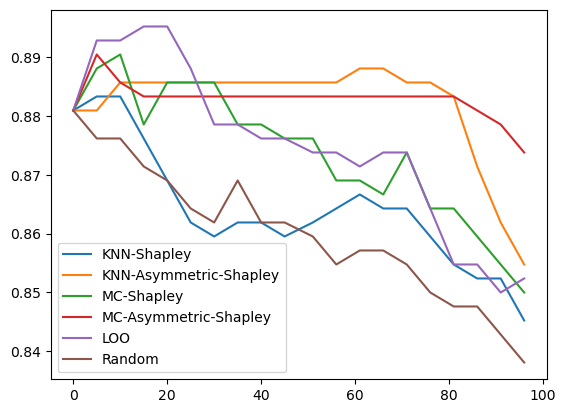

Removing high value augmented data experiment started...


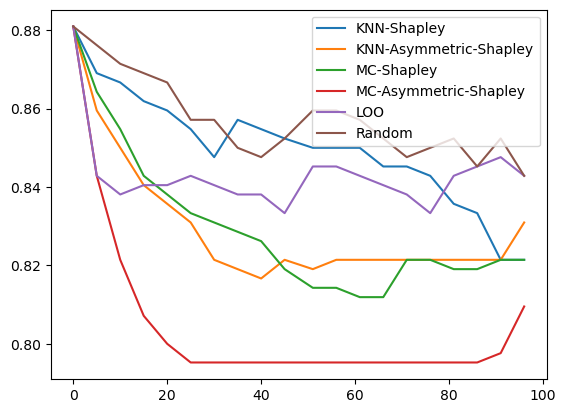

Adding low value augmented data experiment started...


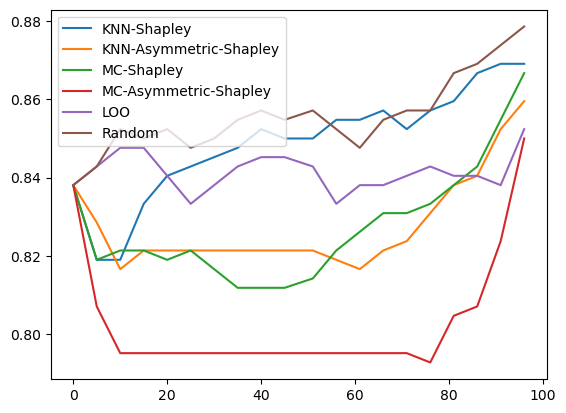

Adding high value augmented data experiment started...


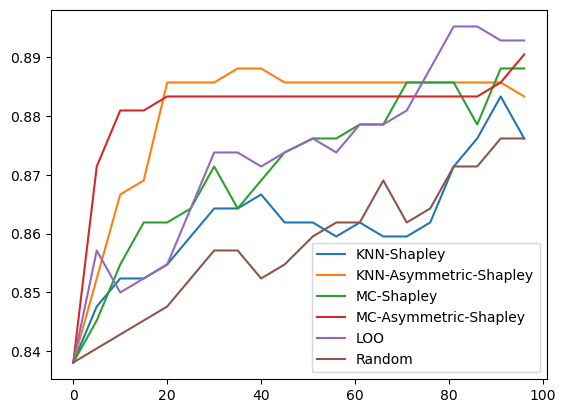

i_sample 5
Removing low value augmented data experiment started...


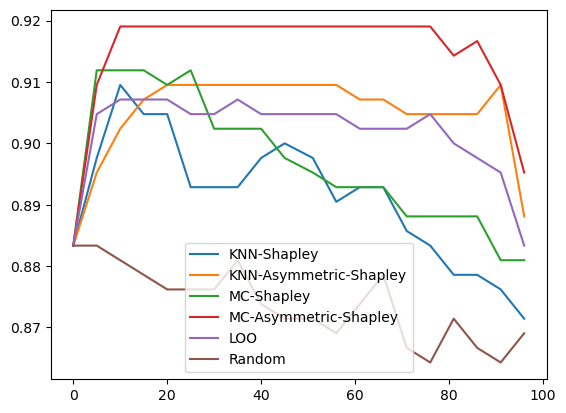

Removing high value augmented data experiment started...


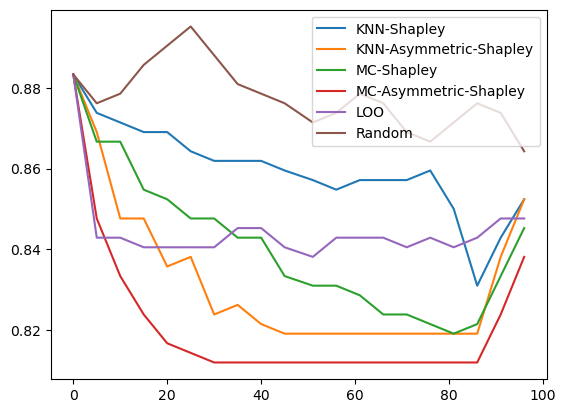

Adding low value augmented data experiment started...


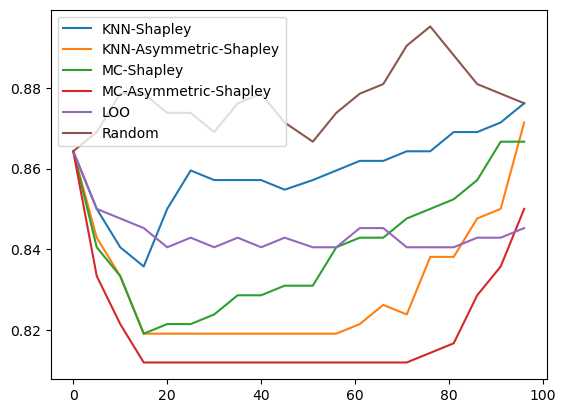

Adding high value augmented data experiment started...


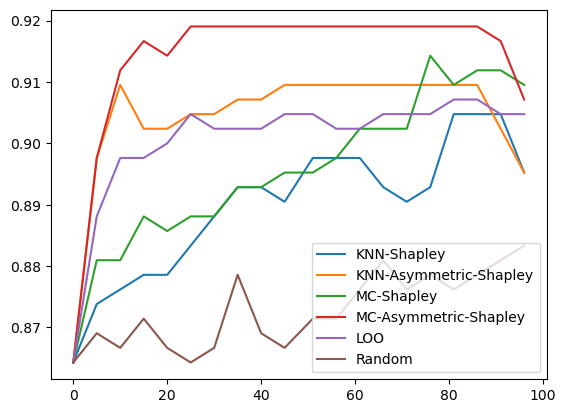

i_sample 6
Removing low value augmented data experiment started...


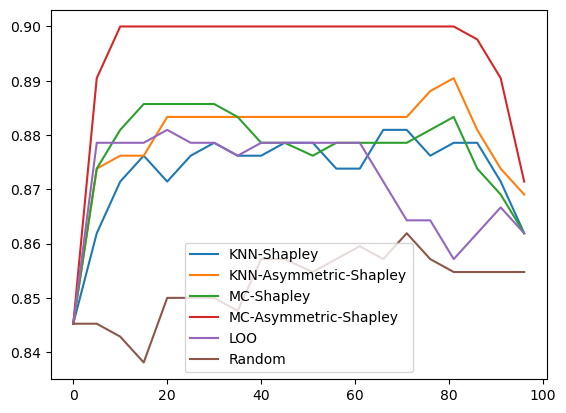

Removing high value augmented data experiment started...


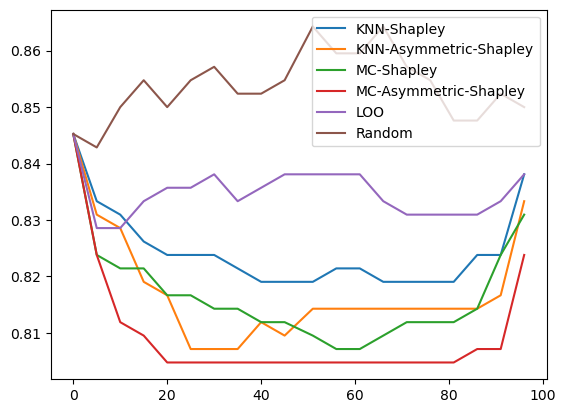

Adding low value augmented data experiment started...


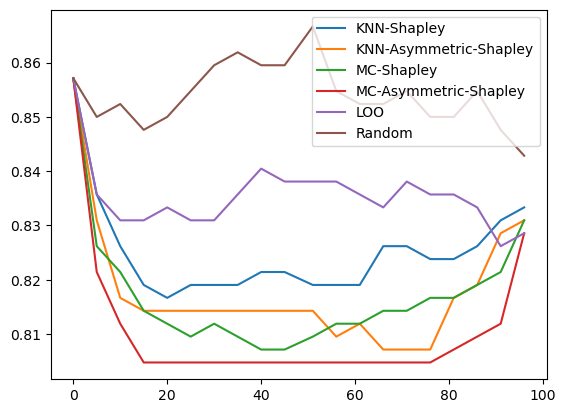

Adding high value augmented data experiment started...


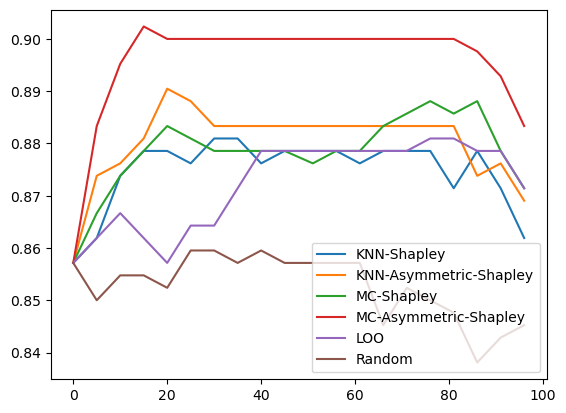

i_sample 7
Removing low value augmented data experiment started...


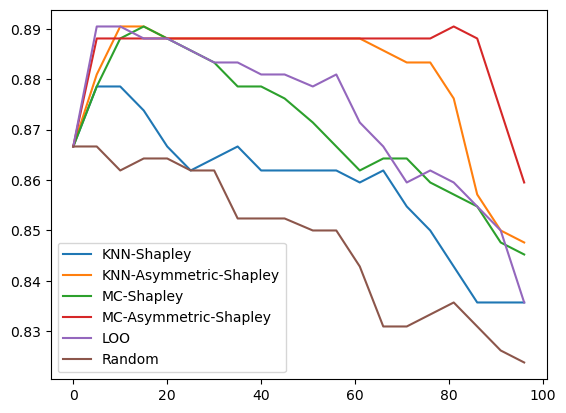

Removing high value augmented data experiment started...


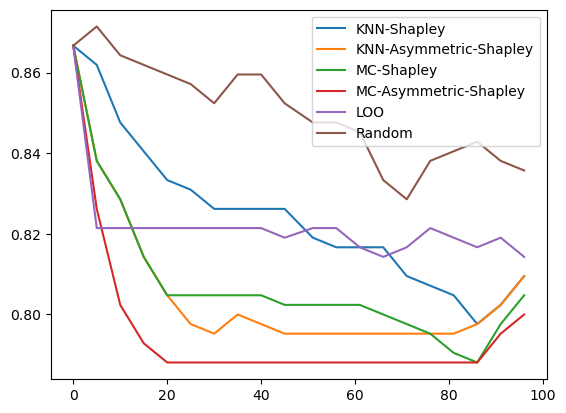

Adding low value augmented data experiment started...


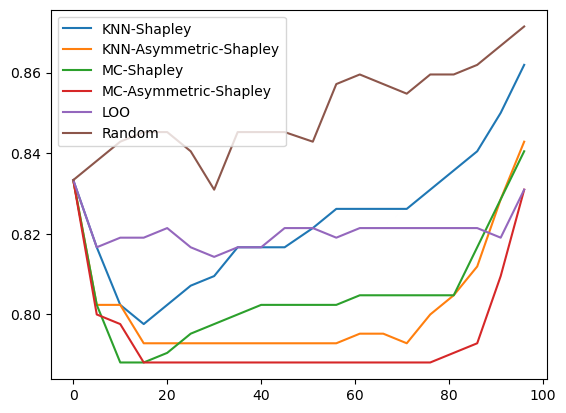

Adding high value augmented data experiment started...


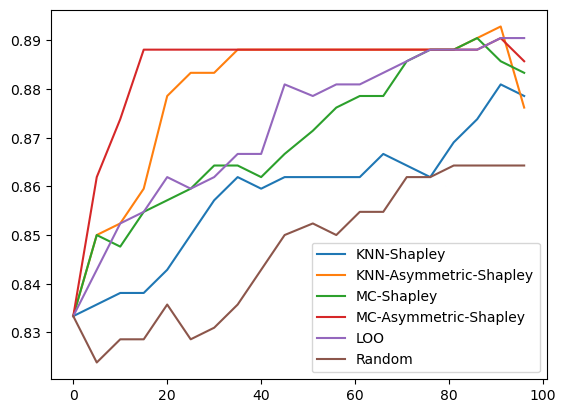

i_sample 8
Removing low value augmented data experiment started...


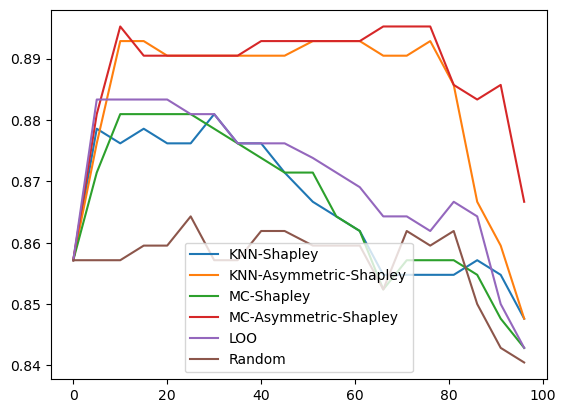

Removing high value augmented data experiment started...


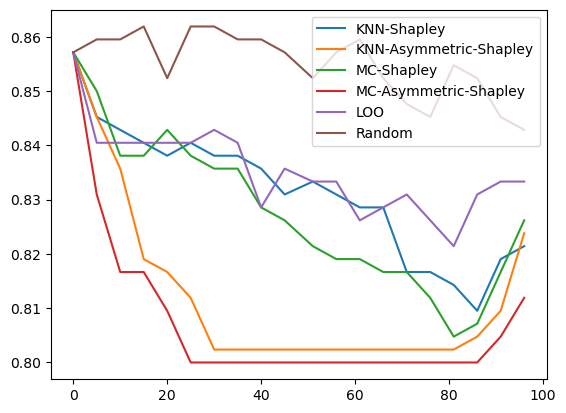

Adding low value augmented data experiment started...


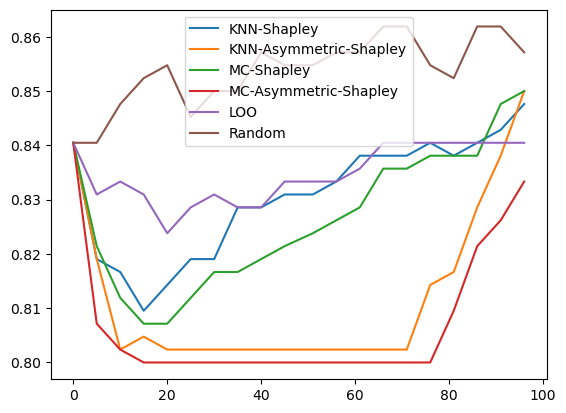

Adding high value augmented data experiment started...


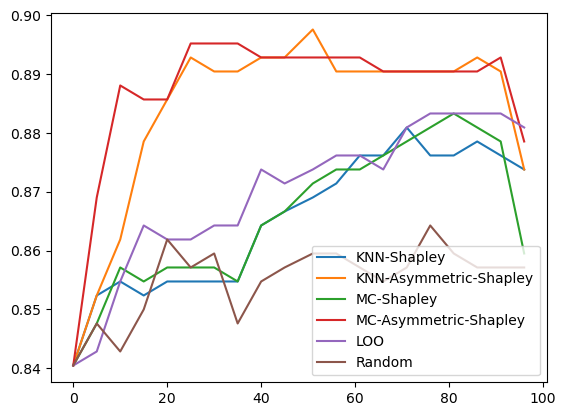

i_sample 9
Removing low value augmented data experiment started...


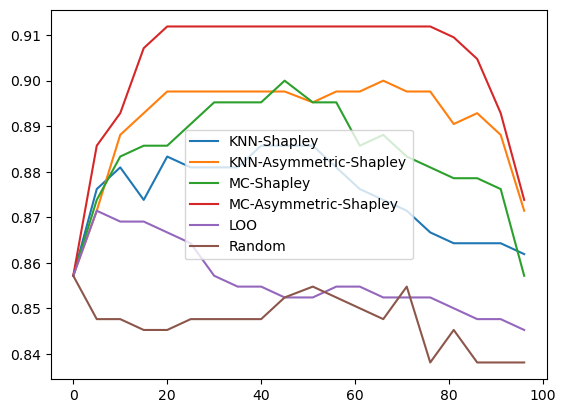

Removing high value augmented data experiment started...


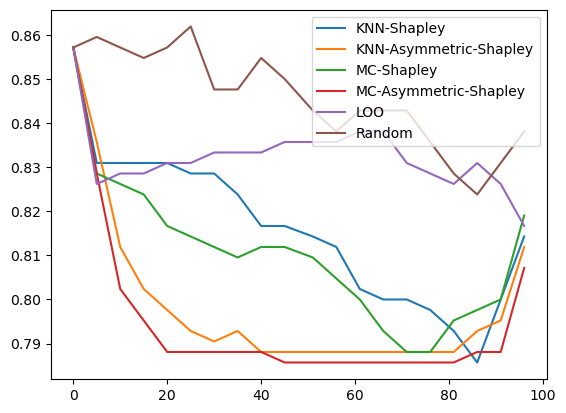

Adding low value augmented data experiment started...


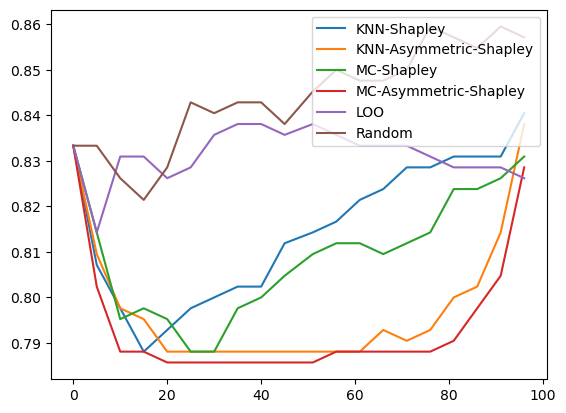

Adding high value augmented data experiment started...


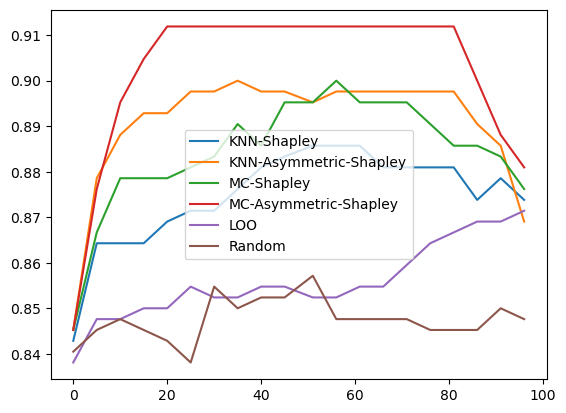

In [29]:
# Performance plot: validation data

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

K = 5
model = KNN(n_neighbors=K, weights='uniform')
modelname = 'knn'

for i_sample in range(n_samples):
    
    print('i_sample', i_sample)
    directory = 'experiments/sequential data valuation/traffic 10 random splits/split{}/experiment_1/'.format(i_sample+1)
    
    shap_vals_lst = [knn_sv_lst[i_sample], knn_asv_lst[i_sample], mc_sv_knn_lst[i_sample], 
                     mc_asv_knn_lst[i_sample], loo_knn_lst[i_sample], rand_lst[i_sample]]
    
    shap_vals_algo_lst = ['KNN-Shapley', 'KNN-Asymmetric-Shapley', 
                          'MC-Shapley', 'MC-Asymmetric-Shapley', 
                          'LOO', 'Random']
    
    X_m1_trn = X_m1_trn_lst[i_sample]
    X_m1m2_trn = X_m1m2_trn_lst[i_sample]
    y_m1m2_trn = y_m1m2_trn_lst[i_sample]
    X_m1m2_val = X_m1m2_val_lst[i_sample]
    y_m1m2_val = y_m1m2_val_lst[i_sample]

    X_m3 = X_m3_lst[i_sample]
    y_m3 = y_m3_lst[i_sample]
    X_m4 = X_m4_lst[i_sample]
    y_m4 = y_m4_lst[i_sample]
    
    X_heldout_ex1 = np.concatenate((X_m3, X_m4))
    y_heldout_ex1 = np.concatenate((y_m3, y_m4))
    
    num_trn_m1 = len(X_m1_trn)
    ind_arr = np.zeros(len(X_m1m2_trn))
    ind_arr[:len(X_m1_trn)] = 1
    
    remove_low_directory = directory + 'remove_low_fig_data_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'
    remove_high_directory = directory + 'remove_high_fig_data_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'
    add_low_directory = directory + 'add_low_fig_data_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'
    add_high_directory = directory + 'add_high_fig_data_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'

    print('Removing low value augmented data experiment started...')
    removing_sequential_data(shap_vals_lst=shap_vals_lst, shap_vals_algo_lst=shap_vals_algo_lst,
                            X_ori_aug=X_m1m2_trn, y_ori_aug=y_m1m2_trn, X_test=X_m1m2_val, y_test=y_m1m2_val,
                             num_trn_ori=num_trn_m1, ind_arr=ind_arr, directory=remove_low_directory,
                            plot_every_percentage = 0.05,
                            model=model, metrics='acc', low_value_first=True)

    print('Removing high value augmented data experiment started...')
    removing_sequential_data(shap_vals_lst=shap_vals_lst, shap_vals_algo_lst=shap_vals_algo_lst,
                            X_ori_aug=X_m1m2_trn, y_ori_aug=y_m1m2_trn, X_test=X_m1m2_val, y_test=y_m1m2_val,
                             num_trn_ori=num_trn_m1, ind_arr=ind_arr, directory=remove_high_directory,
                            plot_every_percentage = 0.05,
                            model=model, metrics='acc', low_value_first=False)

    print('Adding low value augmented data experiment started...')
    adding_sequential_data(shap_vals_lst=shap_vals_lst, shap_vals_algo_lst=shap_vals_algo_lst,
                          X_ori_aug=X_m1m2_trn, y_ori_aug=y_m1m2_trn, X_test=X_m1m2_val, y_test=y_m1m2_val,
                          num_trn_ori=num_trn_m1, ind_arr=ind_arr, directory=add_low_directory,
                          plot_every_percentage = 0.05,
                          model=model, metrics='acc', low_value_first=True)

    print('Adding high value augmented data experiment started...')
    adding_sequential_data(shap_vals_lst=shap_vals_lst, shap_vals_algo_lst=shap_vals_algo_lst,
                          X_ori_aug=X_m1m2_trn, y_ori_aug=y_m1m2_trn, X_test=X_m1m2_val, y_test=y_m1m2_val,
                          num_trn_ori=num_trn_m1, ind_arr=ind_arr, directory=add_high_directory,
                          plot_every_percentage = 0.05,
                          model=model, metrics='acc', low_value_first=False)

### 5. Final Plot (KNN model, val data)

In [30]:
shap_vals_algo_lst = ['KNN-Shapley', 'KNN-Asymmetric-Shapley', 
                          'MC-Shapley', 'MC-Asymmetric-Shapley', 
                          'LOO', 'Random']
remove_low_avg, remove_high_avg, add_low_avg, add_high_avg = {}, {}, {}, {}
modelname = 'knn'

for i_sample in range(n_samples):
    
    print('i_sample', i_sample+1)
    directory = 'experiments/sequential data valuation/traffic 10 random splits/split{}/experiment_1/'.format(i_sample+1)
    
    remove_low_directory = directory + 'remove_low_fig_data_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'
    remove_high_directory = directory + 'remove_high_fig_data_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'
    add_low_directory = directory + 'add_low_fig_data_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'
    add_high_directory = directory + 'add_high_fig_data_model={}_algo_lst={}'.format(modelname, str(shap_vals_algo_lst)) + '.pickle'

    with open(remove_low_directory, 'rb') as fp:
        remove_low = pickle.load(fp)
    
    with open(remove_high_directory, 'rb') as fp:
        remove_high = pickle.load(fp)

    with open(add_low_directory, 'rb') as fp:
        add_low = pickle.load(fp)

    with open(add_high_directory, 'rb') as fp:
        add_high = pickle.load(fp)
    
    if i_sample == 0:
        for key in remove_low.keys():
            remove_low_avg[key] = [np.asarray(remove_low[key])]
            remove_high_avg[key] = [np.asarray(remove_high[key])]
    else:
        for key in remove_low.keys():
            remove_low_avg[key].append(np.asarray(remove_low[key]))
            remove_high_avg[key].append(np.asarray(remove_high[key]))
    
    if i_sample == 0:
        for key in add_low.keys():
            add_low_avg[key] = [np.asarray(add_low[key])]
            add_high_avg[key] = [np.asarray(add_high[key])]
    else:
        for key in add_low.keys():
            add_low_avg[key].append(np.asarray(add_low[key]))
            add_high_avg[key].append(np.asarray(add_high[key]))

            
for key in remove_high_avg.keys():
    if key == 'frac_data_removed':
        remove_high_avg[key] = remove_high_avg[key][0]
        remove_low_avg[key] = remove_low_avg[key][0]
    else:
        remove_high_avg[key] = np.vstack(remove_high_avg[key])
        remove_low_avg[key] = np.vstack(remove_low_avg[key])


for key in add_high_avg.keys():
    if key == 'frac_data_added':
        add_high_avg[key] = add_high_avg[key][0]
        add_low_avg[key] = add_low_avg[key][0]
    else:
        add_high_avg[key] = np.vstack(add_high_avg[key])
        add_low_avg[key] = np.vstack(add_low_avg[key])

i_sample 1
i_sample 2
i_sample 3
i_sample 4
i_sample 5
i_sample 6
i_sample 7
i_sample 8
i_sample 9
i_sample 10


In [31]:
def final_plot_avg(remove_high_avg, remove_low_avg, add_high_avg, add_low_avg, shap_algo_lst, dataset,
                   remove_add_ratio, xticks, root_dir, modelname, imbalance=False, experiment='ex1'):
    
    fig, axes = plt.subplots(1, 4, figsize=(15, 2))
    dataset_font, title_font, label_font, ticks_font, legend_font = 15, 10, 8, 8, 6
    
    # Define the color map for the methods
    color_map = {
        'KNN-Shapley': 'purple',
        'KNN-Asymmetric-Shapley': 'orange',
        'MC-Shapley': 'blue',
        'MC-Asymmetric-Shapley': 'red',
        'LOO': 'green',
        'Random': 'grey'
    }

    # Define the line style for the methods
    line_style_map = {
        'KNN-Shapley': 'solid',
        'KNN-Asymmetric-Shapley':'solid',
        'MC-Shapley': 'solid',
        'MC-Asymmetric-Shapley': 'solid',
        'LOO':'solid',
        'Random': 'solid'
    }

    # Define the marker shapes for the methods
    marker_map = {
        'KNN-Shapley': '*',
        'KNN-Asymmetric-Shapley':'+',
        'MC-Shapley': 'o',  # Circle marker
        'MC-Asymmetric-Shapley': 's',  # Square marker
        'LOO': '^',  # Triangle marker
        'Random': 'd'  # Diamond marker
    }

    data_lst = [remove_low_avg, remove_high_avg, add_low_avg, add_high_avg]
    keys = ['frac_data_removed', 'frac_data_removed', 'frac_data_added', 'frac_data_added']

    # Define subtitles and x_labels
    if experiment == 'ex1':
        subtitles = ['Removing low value\nAugust data', 'Removing high value\nAugust data',
                     'Adding low value\nAugust data', 'Adding high value\nAugust data']
        x_labels = ['Fraction of August data removed (%)', 'Fraction of August data removed (%)',
                    'Fraction of August data added (%)', 'Fraction of August data added (%)']
    else:
        subtitles = ['Removing low value\nSeptember data', 'Removing high value\nSeptember data',
                     'Adding low value\nSeptember data', 'Adding high value\nSeptember data']
        x_labels = ['Fraction of September data removed (%)', 'Fraction of September data removed (%)',
                    'Fraction of September data added (%)', 'Fraction of September data added (%)']

    for i in range(len(data_lst)):
        ymin, ymax = 1, 0
        for j in range(len(shap_algo_lst)):
            bool_ratio = (np.array(data_lst[i][keys[i]]) <= remove_add_ratio)
            
            results = data_lst[i][shap_algo_lst[j]]
            normalized_results = data_lst[i][shap_algo_lst[j]] / data_lst[i][shap_algo_lst[j]][:, [0]]
            # Calculate the mean across the n repetitions
            mean_rslts = np.mean(normalized_results, axis=0)     
            # Calculate the 90% confidence interval
            confidence_band = 1.645 * np.std(normalized_results, axis=0) / np.sqrt(normalized_results.shape[0])
            
            # Plotting the mean and confidence band with markers
            axes[i].plot(
                data_lst[i][keys[i]][bool_ratio], 
                mean_rslts[bool_ratio], 
                color=color_map[shap_algo_lst[j]], 
                linestyle=line_style_map[shap_algo_lst[j]], 
                marker=marker_map[shap_algo_lst[j]],  # Apply marker for each algorithm
                lw=2, markersize=4
            )
            axes[i].fill_between(
                data_lst[i][keys[i]][bool_ratio],
                mean_rslts[bool_ratio] - confidence_band[bool_ratio], 
                mean_rslts[bool_ratio] + confidence_band[bool_ratio], 
                color=color_map[shap_algo_lst[j]], 
                alpha=0.1, 
                label="90% Confidence Band"
            )
            if min(mean_rslts[bool_ratio] - confidence_band[bool_ratio]) < ymin:
                ymin = min(mean_rslts[bool_ratio] - confidence_band[bool_ratio])
            if max(mean_rslts[bool_ratio] + confidence_band[bool_ratio]) > ymax:
                ymax = max(mean_rslts[bool_ratio] + confidence_band[bool_ratio])
            
        # Set x-ticks
        axes[i].set_xticks(xticks)
        
        # Set y-lim
        if i == 0:
            axes[i].set_ylim((ymin-0.03, ymax+0.01))
        else:
            axes[i].set_ylim((ymin-0.01, ymax+0.01))
            
        # Set titles with bold font and in two lines
        axes[i].set_title(subtitles[i], fontsize=title_font, fontweight='bold')
        axes[i].set_xlabel(x_labels[i], fontsize=label_font)

        # Set the y-label and add the dataset name to the first plot
        if imbalance:
            axes[i].set_ylabel('Relative AUC (%)', fontsize=label_font)
        else:
            axes[i].set_ylabel('Relative accuracy (%)', fontsize=label_font)

        # Add the dataset name to the left side of the first plot
        if i == 0:
            axes[i].text(-0.5, 0.8, dataset, fontsize=dataset_font,
                         fontweight='bold', 
                         va='top', ha='center', rotation=90,
                         transform=axes[i].transAxes)

    # Adjust the spacing between plots to make more room for y-labels
    plt.subplots_adjust(left=0.1, right=0.85, wspace=0.5)  # Increase wspace for more room between plots

    # Create custom colorbar based on the defined color map
    from matplotlib.colors import ListedColormap
    import matplotlib as mpl

    # Convert the color map values into a colormap object
    cmap = ListedColormap([color_map[algo] for algo in shap_algo_lst])

    # Normalize the ticks for the colorbar
    norm = mpl.colors.BoundaryNorm(boundaries=np.arange(len(shap_algo_lst)+1)-0.5, ncolors=len(shap_algo_lst))

    # Create the colorbar
    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    colorbar = plt.colorbar(sm, ax=axes, orientation='vertical', pad=0.02, fraction=0.05)
    colorbar.set_ticks(np.arange(len(shap_algo_lst)))
    colorbar.set_ticklabels(shap_algo_lst)
    
    # Save the figure with bbox_inches to avoid cutting off the titles
    plt.savefig(root_dir + 'final_plot_model={}.jpg'.format(modelname), dpi=500, 
                bbox_inches='tight')
    plt.show()
    return

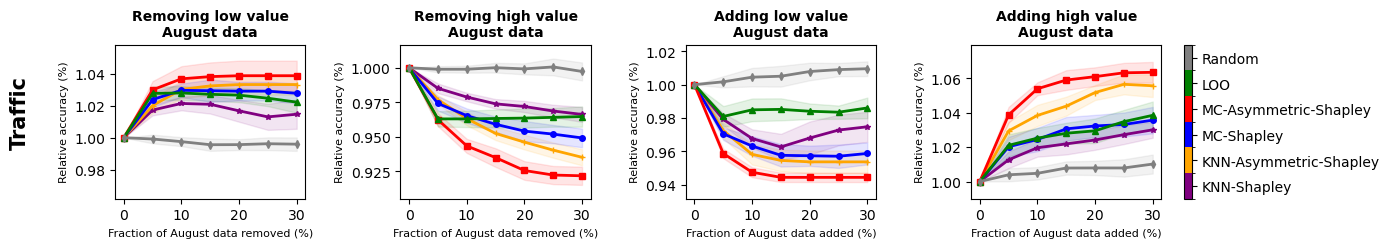

In [32]:
# Plot final plot
import matplotlib.pyplot as plt

final_plot_avg(remove_high_avg, remove_low_avg, add_high_avg, 
               add_low_avg, shap_vals_algo_lst, remove_add_ratio = 30,
               xticks=[0, 10, 20, 30], modelname='knn',
               root_dir='experiments/sequential data valuation/traffic 10 random splits/experiment_1/validation data/',
               dataset='Traffic', experiment='ex1', imbalance=False)